# 신경망이란? 
신경망은 퍼셉트론의 상위개념으로, 퍼셉트론의 경우 주어진 입력값이 임의의 임계값에 따라서 출력이 0 과 1 로 바뀌었었다.  
$$
\begin{align}
\alpha &= b + w_1 x_1 + w_2 x_2 \\
h(\alpha) &= \begin{cases}
0 & ( \alpha \leq 0)  \\
1 & ( \alpha > 0 )
\end{cases}
\end{align}
$$
이때 특정 임계값을 기준으로 출력값이 바뀌는 이러한 함수 $h$를 **계단 함수**라고 한다.  
계단 함수는 **활성화 함수**의 한 종류로, 입력 신호를 출력 신호로 변환하는 함수라고 할 수 있다.  

신경망은 일반적으로 다음과 같은 형태를 가진다.

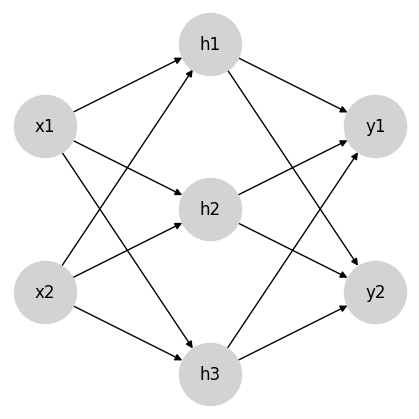

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_nodes_from(["x1", "x2", "h1", "h2", "h3", "y1", "y2"])
G.add_edges_from([
    ("x1", "h1"),
    ("x2", "h1"),
    ("x1", "h2"),
    ("x2", "h2"),
    ("x1", "h3"),
    ("x2", "h3"),
    ("h1", "y1"),
    ("h2", "y1"),
    ("h3", "y1"),
    ("h1", "y2"),
    ("h2", "y2"),
    ("h3", "y2")
])
pos = {
    "x1": (0, 0.5),
    "x2": (0, -0.5),
    "h1": (1, 1),
    "h2": (1, 0),
    "h3": (1, -1),
    "y1": (2, 0.5),
    "y2": (2, -0.5),
}
plt.figure(figsize=(4, 4))
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=2000,
    node_color="lightgray",
    arrows=True
)
plt.show()

각각 입력층, 은닉층, 출력층으로, 입력층과 출력층은 1개씩, 은닉층은 1개 이상 존재할 수 있다.  
입력층을 제외한 각 층의 노드들은 이전 층의 노드들로부터 값을 받아오고, 이를 노드 내 활성화 함수에 입력하여 나온 출력값을 다음 층의 노드들에게 전달한다.  
활성화 함수에는 무엇이 있는지 살펴보자.


## 활성화 함수

### Sigmoid function
시그모이드 함수는 $\mathbb{R} \to [0,1]$ 로 변환하는 함수로, 다음과 같은 형태를 가진다.
$$
h(x) = \frac{1}{1+\exp(-x)}
$$
$x=0$ 일 때 $h(x) = 0.5$이고,  
$x \to \infty \implies h(x) \to 1$,  
$x \to -\infty \implies h(x) \to 0$ 으로 각각 수렴한다.

### ReLU function
ReLU 함수는 $\mathbb{R} \to [0, \infty)$ 로 변환하는 함수로, 다음과 같은 형태를 가진다.
$$
h(x) = \max(0,x) = \begin{cases} x & (x > 0) \\ 0 & (x \leq 0)\end{cases}
$$

### CODE
각 활성화 함수를 코드로 구현해보자.

In [19]:
import matplotlib.pyplot as plt
import numpy as np

In [29]:
def step_function(x):
    return np.array(x > 0, dtype=int)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

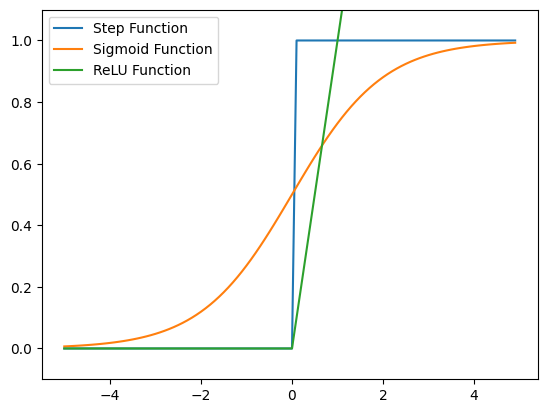

In [34]:
x = np.arange(-5.0, 5.0, 0.1)
y_step = step_function(x)
y_sigmoid = sigmoid(x)
y_relu = relu(x)

plt.plot(x, y_step, label="Step Function")
plt.plot(x, y_sigmoid, label="Sigmoid Function")
plt.plot(x, y_relu, label="ReLU Function")
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()

### 출력층
신경망은 분류와 회귀 문제에 따라서 출력층에서 사용하는 활성화 함수가 달라진다.  
일반적으로 회귀 문제에서는 항등함수를, 분류 문제에서는 소프트맥스 함수를 사용한다.

#### Identity function
항등함수는 입력을 그대로 출력하는 함수이다. 즉, 
$$
h(x) = x
$$

#### Softmax function
소프트맥스 함수는 $\mathbb{R}^{N} \to [0,1]^{N}$으로 전환하는 함수로, 다음과 같다.
$$
y_{k} = \frac{\exp(\alpha_{k})}{\sum_{n=1}^{N} \exp(\alpha_{n})}
$$
이때 $N$은 출력층의 노드의 수이고, $y_{k}$ $( 1 \leq k \leq N)$는 출력층의 $k$-th 노드의 출력값을 의미한다.  
소프트맥스는 Overflow에 대비하여 다음과 같이 나타낼 수도 있다.
$$
y_{k} = \frac{\exp(\alpha_{k} - m)}{\sum_{n=1}^{N} (\exp(\alpha_{n} - m))}
$$
이때 $m$은 일반적으로 $m = \max(\bold{\alpha})$, 즉, 입력 값 중 가장 큰 값으로 설정한다.

#### CODE

In [35]:
def softmax(a):
    m = np.max(a)
    exp_a = np.exp(a - m)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

## 출력층의 수
출력층의 노드 수는 보통 문제에 따라 다르다.  
예를 들어 0부터 9까지 손글씨로 그려진 이미지에 대해 어떤 숫자인지 분류하는 문제에서는 출력층의 노드를 0부터 9까지 총 10개로 설정한다.  
이러한 출력층의 각 노드 중에서 가장 높은 값을 가지는 노드가 최종 결과가 되는 것이다.  
이 예시를 좀 더 자세하게 살펴보자.

### 손글씨 숫자 인식 추론 과정

#### 데이터 준비

In [46]:
from tensorflow.keras.datasets import mnist

(x_train, t_train), (x_test, t_test) = mnist.load_data()

print("x_train.shape =", x_train.shape)  # (60000, 28, 28)
print("t_train.shape =", t_train.shape)  # (60000,)
print("x_test.shape =", x_test.shape)   # (10000, 28, 28)
print("t_test.shape =", t_test.shape)   # (10000,)

x_train.shape = (60000, 28, 28)
t_train.shape = (60000,)
x_test.shape = (10000, 28, 28)
t_test.shape = (10000,)


label = 5
img.shape = (28, 28)


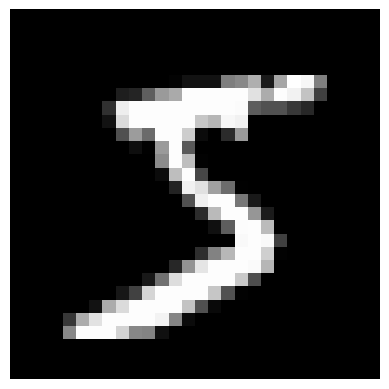

In [45]:
import matplotlib.pyplot as plt

def img_show(img):
    plt.imshow(img, cmap="gray")
    plt.axis("off")
    plt.show()
    
img = x_train[0]
label = t_train[0]
print("label =", label)  # 5

print("img.shape =", img.shape)  # (28, 28)
img_show(img)

#### 추론 과정

In [65]:
import pickle


def get_data():
    (x_train, t_train), (x_test, t_test) = mnist.load_data()
    x_train = x_train.reshape(60000, 784).astype("float32") / 255.0
    x_test = x_test.reshape(10000, 784).astype("float32") / 255.0
    return x_test, t_test

def init_network():
    with open("../Data/sample_weight.pkl", "rb") as f:
        network = pickle.load(f)
    return network

def prdict(network, x):
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [ ]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = prdict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1
        
print("Accuracy:", str(float(accuracy_cnt) / len(x))) # Accuracy: 0.9352

Accuracy: 0.9352


C:\Users\aj200\AppData\Local\Temp\ipykernel_22232\1484701550.py:12: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  network = pickle.load(f)
